<a href="https://colab.research.google.com/github/bielsqqq/Rumah_sakit/blob/main/UAS_REMEDI_BDDM_GABRIEL_ANDRA_P_SOLIN_23_11_5637.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS BIG DATA AND DATA MINING

Nama :Gabriel Andra P Solin

NIM  :23.11.5637


**LANGKAH 1 — Import Library**

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**LANGKAH 2 — Upload & Load Dataset**

In [ ]:
# Upload file ke Colab dulu
from google.colab import files
uploaded = files.upload()

Saving data_diabetes.csv to data_diabetes.csv


In [ ]:
# Load dataset
df = pd.read_csv('data_diabetes.csv')

# Tampilkan 5 data teratas
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**LANGKAH 3 — Data Understanding**

In [ ]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


In [ ]:
# Statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.803607,121.354709,68.743487,20.57515,80.390782,31.984569,0.485377,33.086172,0.364729
std,3.345786,32.441489,19.452608,15.72019,119.774561,8.210358,0.345546,11.636849,0.481837
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.00000,0.000000,27.050000,0.252000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.00000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.00000,122.000000,36.600000,0.633500,39.500000,1.000000
max,17.000000,197.000000,122.000000,63.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Cek missing value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**LANGKAH 4 — Data Preprocessing**


 Mengganti nilai 0 yang tidak logis

In [ ]:
# Kolom yang tidak boleh bernilai 0
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols:
    df[col] = df[col].replace(0, df[col].median())

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,36,33.6,0.627,50,1
1,1,85,66,29,36,26.6,0.351,31,0
2,8,183,64,23,36,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**LANGKAH 5 — Pisahkan Fitur & Target**

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,36,33.6,0.627,50
1,1,85,66,29,36,26.6,0.351,31
2,8,183,64,23,36,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**LANGKAH 6 — Split Data Training & Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Jumlah data training:", X_train.shape)
print("Jumlah data testing:", X_test.shape)

Jumlah data training: (399, 8)
Jumlah data testing: (100, 8)


**LANGKAH 7 — Normalisasi Data**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**LANGKAH 8 — Model Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

**LANGKAH 9 — Prediksi**

In [ ]:
y_pred = model.predict(X_test)

y_pred[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

**LANGKAH 10 — Evaluasi Model**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [ ]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[57,  7],
       [13, 23]])

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        64
           1       0.77      0.64      0.70        36

    accuracy                           0.80       100
   macro avg       0.79      0.76      0.77       100
weighted avg       0.80      0.80      0.80       100



**LANGKAH 11 — Visualisasi Confusion Matrix**

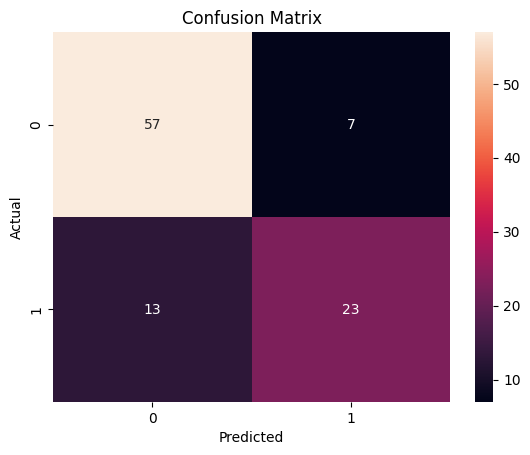

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**LANGKAH 12 — Exploratory Data Analysis (EDA)**

Melihat jumlah penderita diabetes vs tidak

In [ ]:
# Hitung jumlah Outcome
df['Outcome'].value_counts()

,count
Outcome,
0,317
1,182


Visualisasi jumlah penderita diabetes

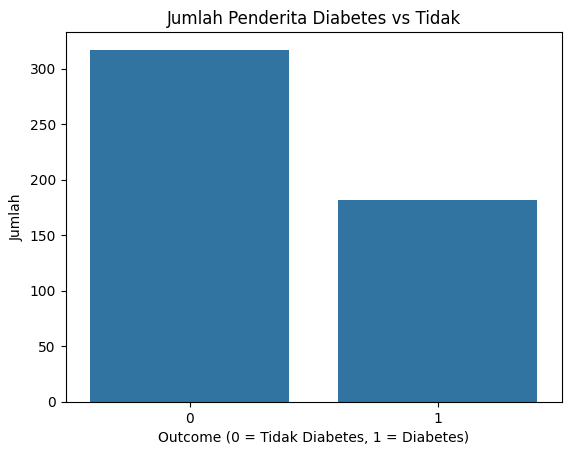

In [ ]:
plt.figure()
sns.countplot(x='Outcome', data=df)
plt.title("Jumlah Penderita Diabetes vs Tidak")
plt.xlabel("Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
plt.ylabel("Jumlah")
plt.show()

Distribusi setiap fitur

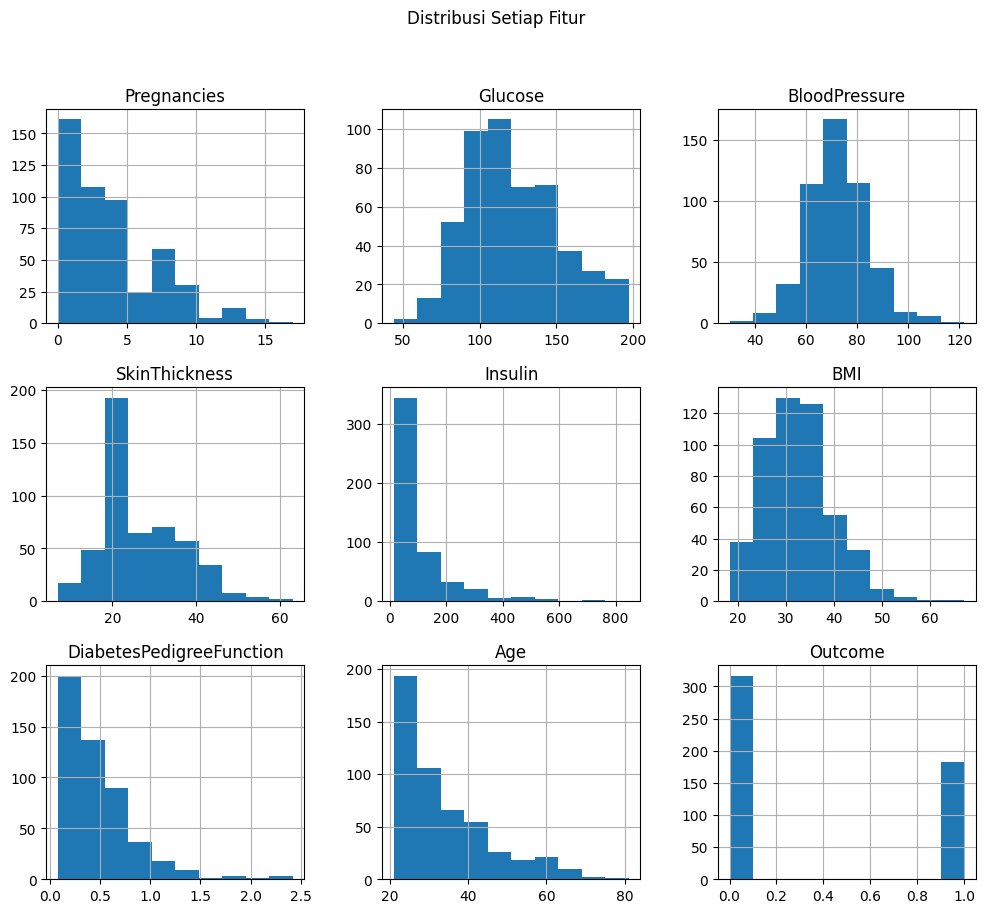

In [ ]:
df.hist(figsize=(12,10))
plt.suptitle("Distribusi Setiap Fitur")
plt.show()

Korelasi antar fitur

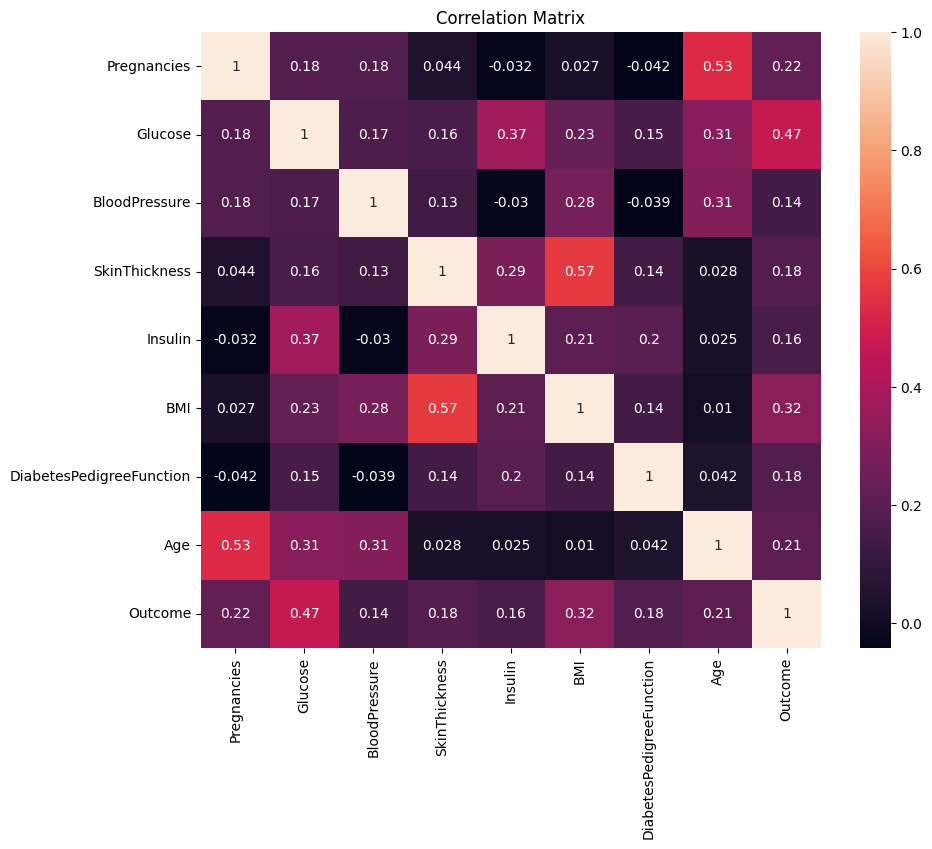

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

Distribusi Glucose berdasarkan Outcome

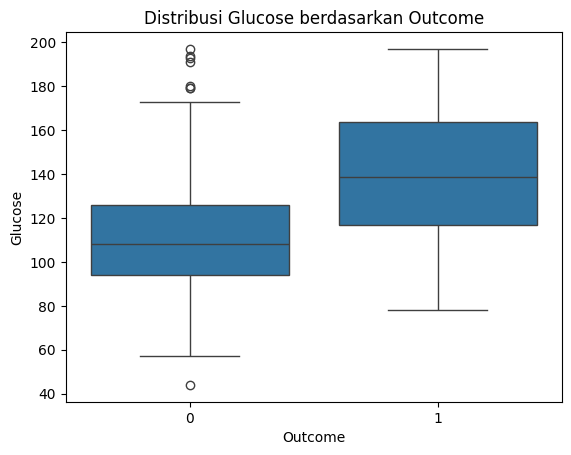

In [ ]:
plt.figure()
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Distribusi Glucose berdasarkan Outcome")
plt.show()

Distribusi BMI berdasarkan Outcome

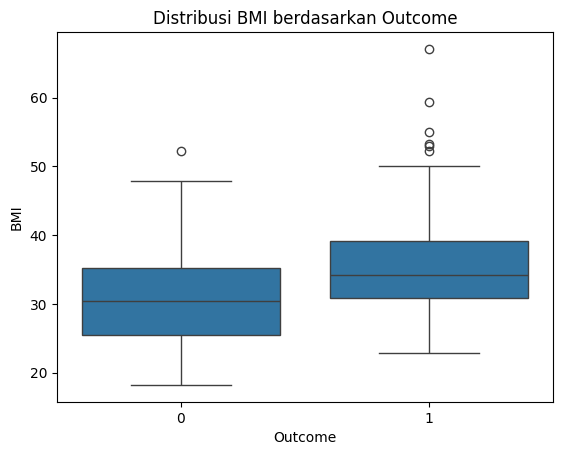

In [ ]:
plt.figure()
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("Distribusi BMI berdasarkan Outcome")
plt.show()

Distribusi Age berdasarkan Outcome

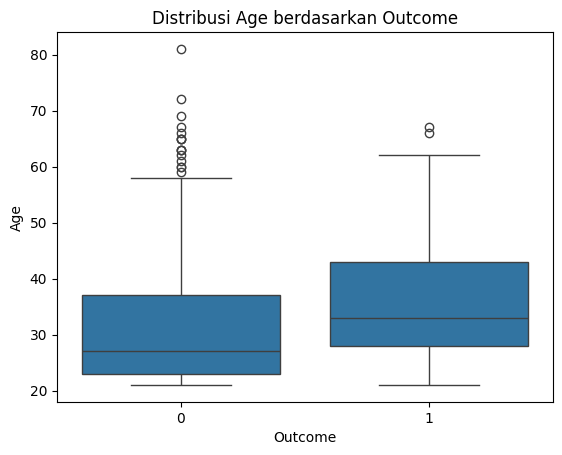

In [ ]:
plt.figure()
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Distribusi Age berdasarkan Outcome")
plt.show()